<a href="https://colab.research.google.com/github/Mateus-cpa/ebac-cadernos-de-atividades/blob/main/Comparativo_volume_de_execu%C3%A7%C3%A3o_csv_e_parquet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Big Data II - Armazenamento
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Introdução;</li>
  <li>Orientação a coluna;</li>
  <li>Particionamento.</li>
</ol>

---

# **Exercícios**

## 1\. Particionamento e orientação a coluna.

Replique as atividades da aula 3 em sua conta da AWS.

1.1. Faça o download do arquivo `crime.csv` (fonte [Kaggle](https://www.kaggle.com/yamqwe/chicago-crimee?select=chicago_crime_2014.csv)).

In [1]:
!wget https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/crime.csv -q -O crime.csv

1.2. Leia os dados em um DataFrame Pandas e crie a coluna `reference_date`.

In [2]:
# Solução do item 1.2.
import pandas as pd

df = pd.read_csv('crime.csv')


In [3]:
# transformar em yyyy-mm-dd
df['reference_date'] = pd.to_datetime(df['Date']).dt.strftime('%Y-%m-%d')
df.sample(n=10)

,index,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Latitude,Longitude,reference_date
127359,127359,9674436,HX324816,06/29/2014 05:30:00 PM,045XX S MC DOWELL AVE,0915,MOTOR VEHICLE THEFT,"TRUCK, BUS, MOTOR HOME",STREET,False,False,924,9,3.0,61.0,07,41.811314,-87.661485,2014-06-29
134894,134894,9686981,HX337480,07/06/2014 02:00:00 AM,029XX N SHERIDAN RD,0810,THEFT,OVER $500,RESIDENCE,False,False,1934,19,44.0,6.0,06,41.936090,-87.639415,2014-07-06
71730,71730,9580384,HX231188,04/21/2014 12:25:00 AM,025XX W SUPERIOR ST,0497,BATTERY,AGGRAVATED DOMESTIC BATTERY: OTHER DANG WEAPON,APARTMENT,True,True,1221,12,26.0,24.0,04B,41.894788,-87.690574,2014-04-21
208864,208864,9811738,HX460425,10/08/2014 08:00:00 PM,064XX S HALSTED ST,0460,BATTERY,SIMPLE,"SCHOOL, PUBLIC, BUILDING",False,False,723,7,20.0,68.0,08B,41.777580,-87.644730,2014-10-08
47292,47292,9536253,HX190092,03/18/2014 07:44:00 PM,116XX S MARSHFIELD AVE,0860,THEFT,RETAIL THEFT,DEPARTMENT STORE,False,False,2234,22,34.0,75.0,06,41.681989,-87.662568,2014-03-18
60707,60707,9560955,HX212615,04/05/2014 11:38:00 PM,005XX E 91ST PL,0560,ASSAULT,SIMPLE,RESIDENCE PORCH/HALLWAY,False,True,633,6,6.0,44.0,08A,41.728344,-87.610641,2014-04-05
77340,77340,9590163,HX240608,04/27/2014 03:00:00 PM,046XX S LEAMINGTON AVE,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE-GARAGE,False,False,814,8,23.0,56.0,05,41.808505,-87.751743,2014-04-27
163695,163695,9734637,HX384550,08/12/2014 01:45:00 PM,013XX S INDEPENDENCE BLVD,0810,THEFT,OVER $500,RESIDENCE,False,False,1011,10,24.0,29.0,06,41.863930,-87.719452,2014-08-12
65553,65553,9570290,HX220809,04/12/2014 10:30:00 AM,0000X N KENTON AVE,1506,PROSTITUTION,SOLICIT ON PUBLIC WAY,STREET,True,False,1113,11,28.0,25.0,16,41.881094,-87.740106,2014-04-12
39557,39557,9521640,HX176368,03/07/2014 09:00:00 PM,047XX S COTTAGE GROVE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,VEHICLE NON-COMMERCIAL,False,False,223,2,4.0,38.0,08B,41.809305,-87.606558,2014-03-07


1.3. Persista o dado no DataFrame em um arquivo csv e em arquivos parquet, estes últimos comprimidos e particionados pela coluna `reference_date`.

In [4]:
# Solução do item 1.3.
df.to_csv('enriched_crime.csv', index=False, sep=',')
df.to_parquet('./crime', engine='pyarrow', compression='gzip', partition_cols='reference_date')

#mostrar arquivos gerados
import os
for file in os.listdir():
  if 'crime' in file:
    print(file)

crime.csv
crime
enriched_crime.csv


1.4. Crie os recursos no AWS S3 e AWS IAM e persista os dados em seus respectivos *buckets*.

In [5]:
# Solução do item 1.4.
# carregar acesso do computador
from google.colab import files
uploaded = files.upload()
pass_aws = next(iter(uploaded))

df_aws = pd.read_csv(pass_aws)
df_aws.columns

Saving colab_accessKeys.csv to colab_accessKeys.csv


Index(['Access key ID', 'Secret access key'], dtype='object')

In [6]:
aws_access_key_id = df_aws['Access key ID'][0]
aws_secret_access_key = df_aws['Secret access key'][0]

In [7]:
!pip install boto3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.1/139.1 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 84.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.7/82.7 kB 5.9 MB/s eta 0:00:00


In [8]:
import boto3
import os

In [9]:
client = boto3.client(
    's3',
    aws_access_key_id=aws_access_key_id,
    aws_secret_access_key=aws_secret_access_key
)

In [10]:
BUCKET = 'modulo-42-ebac-parquet-mateus'

i=0

for root, dirs, files in os.walk('./crime'):
  carregado = f'{round(100*i/365, 2)}% carregado'
  print(carregado) # mostrador de carregamento
  i+=1 # contador
  for file in files:
    path = os.path.join(root, file)
    bucket_path = '/'.join(path.split(sep='/')[2:]) # automatiza nome do caminho de cada arquivo
    client.upload_file(path, BUCKET, bucket_path) # carrega arquivo na S3

    print(f'Arquivo {file} carregado')


0.0% carregado
0.27% carregado
Arquivo 6b278da1d6e04c728a20a9b84d497e60-0.parquet carregado
0.55% carregado
Arquivo 6b278da1d6e04c728a20a9b84d497e60-0.parquet carregado
0.82% carregado
Arquivo 6b278da1d6e04c728a20a9b84d497e60-0.parquet carregado
1.1% carregado
Arquivo 6b278da1d6e04c728a20a9b84d497e60-0.parquet carregado
1.37% carregado
Arquivo 6b278da1d6e04c728a20a9b84d497e60-0.parquet carregado
1.64% carregado
Arquivo 6b278da1d6e04c728a20a9b84d497e60-0.parquet carregado
1.92% carregado
Arquivo 6b278da1d6e04c728a20a9b84d497e60-0.parquet carregado
2.19% carregado
Arquivo 6b278da1d6e04c728a20a9b84d497e60-0.parquet carregado
2.47% carregado
Arquivo 6b278da1d6e04c728a20a9b84d497e60-0.parquet carregado
2.74% carregado
Arquivo 6b278da1d6e04c728a20a9b84d497e60-0.parquet carregado
3.01% carregado
Arquivo 6b278da1d6e04c728a20a9b84d497e60-0.parquet carregado
3.29% carregado
Arquivo 6b278da1d6e04c728a20a9b84d497e60-0.parquet carregado
3.56% carregado
Arquivo 6b278da1d6e04c728a20a9b84d497e60-0.par

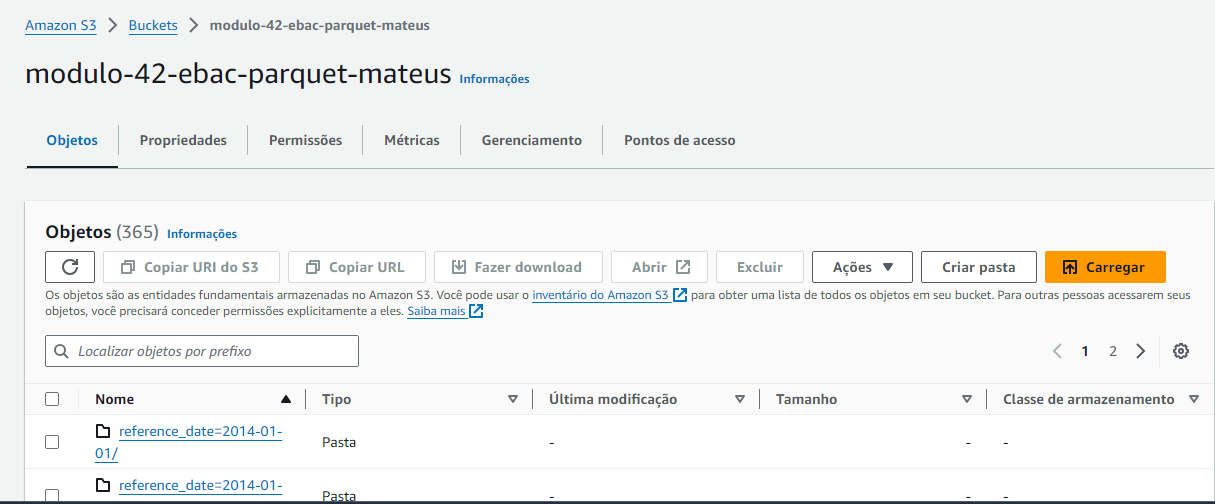

1.5. Crie os recursos no AWS Athena e execute as consultas SQL da aula.

In [11]:
# Solução do item 1.5.1. Criar tabela externa 'crime_csv'


```sql
CREATE EXTERNAL TABLE `crime_csv`(
  `index` bigint,
  `id` string,
  `case number` string,
  `date` string,
  `block` string,
  `iucr` string,
  `primary type` string,
  `description` string,
  `location description` string,
  `arrest` string,
  `domestic` string,
  `beat` string,
  `district` string,
  `ward` string,
  `community area` string,
  `fbi code` string,
  `latitude` string,
  `longitude` string,
  `reference_date` string)
ROW FORMAT SERDE
  'org.apache.hadoop.hive.serde2.OpenCSVSerde'
 WITH SERDEPROPERTIES (
   'separatorChar' = ',',
   'quoteChar' = '\"',
   'escapeChar' = '\\'
   )
STORED AS INPUTFORMAT
  'org.apache.hadoop.mapred.TextInputFormat'
OUTPUTFORMAT
  'org.apache.hadoop.hive.ql.io.HiveIgnoreKeyTextOutputFormat'
LOCATION
  's3://modulo-42-ebac-csv/'
TBLPROPERTIES (
  "skip.header.line.count"="1")
```

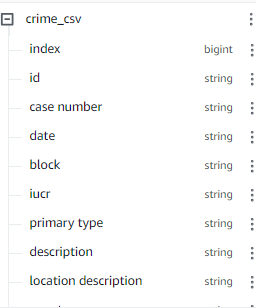

In [ ]:
# Solução do item 1.5.2. Criar tabela externa 'crime_parquet'


```sql
CREATE EXTERNAL TABLE `crime_parquet`(
  `index` bigint,
  `id` bigint,
  `case number` string,
  `date` string,
  `block` string,
  `iucr` string,
  `primary type` string,
  `description` string,
  `location description` string,
  `arrest` boolean,
  `domestic` boolean,
  `beat` bigint,
  `district` bigint,
  `ward` double,
  `community area` double,
  `fbi code` string,
  `latitude` double,
  `longitude` double)
PARTITIONED BY (
  `reference_date` string)
ROW FORMAT SERDE
  'org.apache.hadoop.hive.ql.io.parquet.serde.ParquetHiveSerDe'
STORED AS INPUTFORMAT
  'org.apache.hadoop.hive.ql.io.parquet.MapredParquetInputFormat'
OUTPUTFORMAT
  'org.apache.hadoop.hive.ql.io.parquet.MapredParquetOutputFormat'
LOCATION
  's3://modulo-42-ebac-parquet/'
```

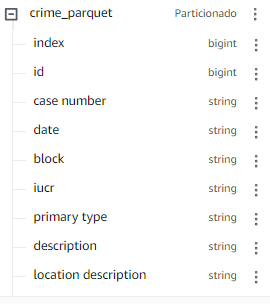

In [ ]:
# Solução do item 1.5.3. Comparar volume de dados escaneados em 'crime_csv' e 'crime_parquet'
# 1.5.3.1. Efeito da orientação a coluna

```sql
SELECT "location description", COUNT(id) as "amount"
FROM crime_csv
GROUP BY "location description"
ORDER BY amount DESC;
```
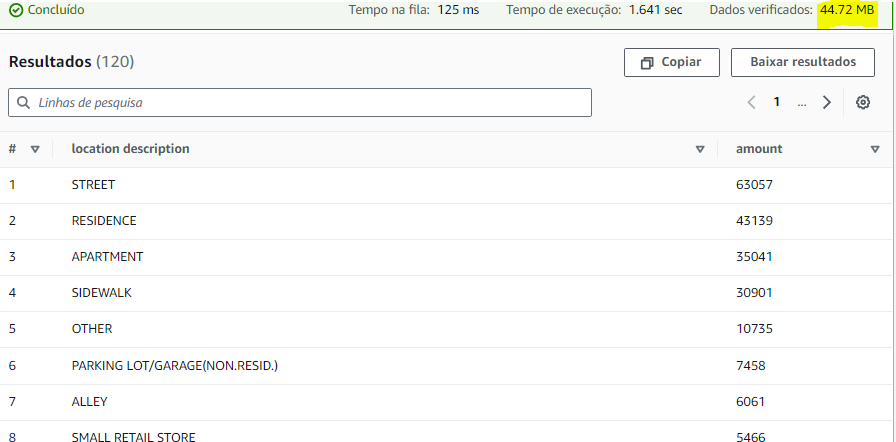

```sql
SELECT "location description", COUNT(id) as "amount"
FROM crime_parquet
GROUP BY "location description"
ORDER BY amount DESC;
```
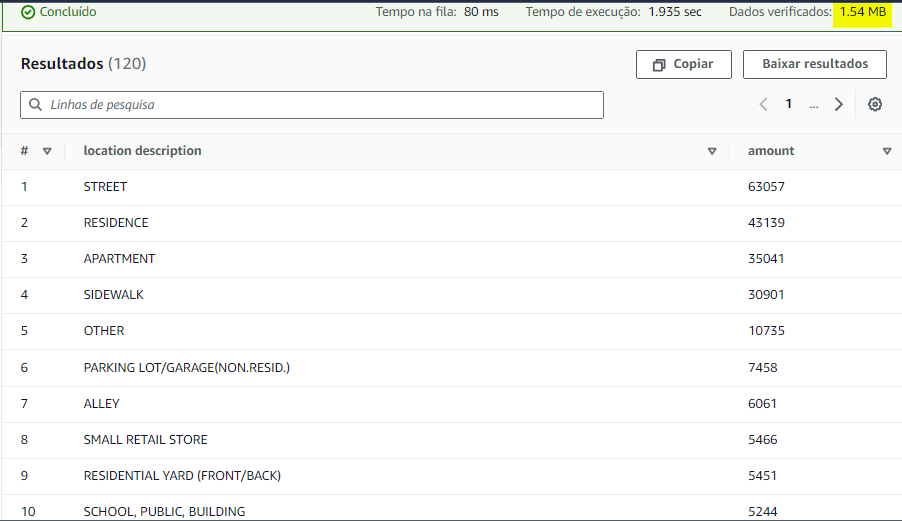

In [ ]:
# 1.5.3.2. Efeito do particionamento

```sql
SELECT *
FROM crime_csv
WHERE CAST(reference_date as DATE) BETWEEN DATE '2014-12-01' and DATE '2014-12-31'
```
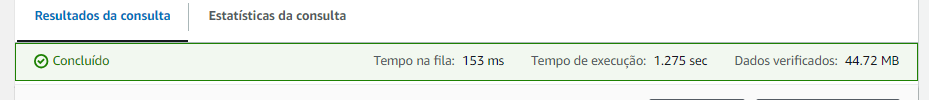

```sql
SELECT *
FROM crime_parquet
WHERE CAST(reference_date as DATE) BETWEEN DATE '2014-12-01' and DATE '2014-12-31'
```
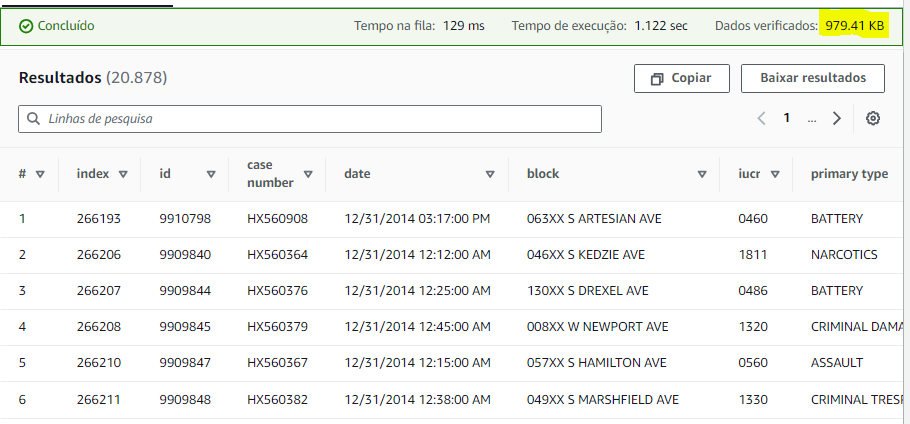

In [ ]:
# 1.5.3.3. Efeito da orientação a coluna e do particionamento

```sql
SELECT "location description", COUNT(id) as "amount"
FROM crime_csv
WHERE CAST(reference_date as DATE) BETWEEN DATE '2014-12-01' and DATE '2014-12-31'
GROUP BY "location description"
ORDER BY amount DESC
```
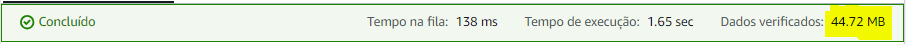

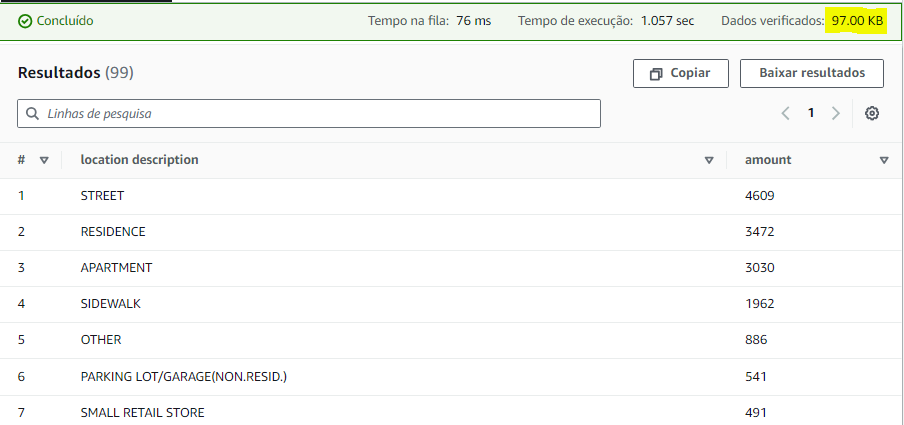

In [21]:
# 1.5.3.4. Resultados

# escrever csv
%%writefile resultados.csv
efeito,tipo,volume_de_execucao
'orientacao a coluna','csv',44.72
'orientacao a coluna','parquet',1.54
'particionamento','csv',44.72
'particionamento','parquet',0.979
'ambos','csv',44.72
'ambos','parquet',0.097

Overwriting resultados.csv


In [22]:
df_resultados = pd.read_csv('resultados.csv', sep=',')
df_resultados

,efeito,tipo,volume_de_execucao
0,'orientacao a coluna','csv',44.720
1,'orientacao a coluna','parquet',1.540
2,'particionamento','csv',44.720
3,'particionamento','parquet',0.979
4,'ambos','csv',44.720
5,'ambos','parquet',0.097


In [23]:
import seaborn as sns
import matplotlib.pyplot

<Axes: xlabel='efeito', ylabel='volume_de_execucao'>

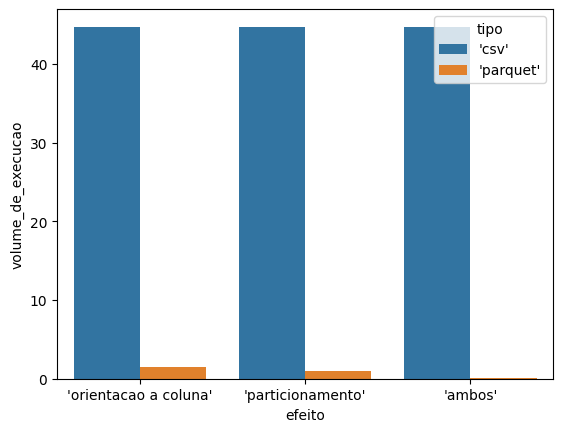

In [24]:
sns.barplot(data=df_resultados, x='efeito', y='volume_de_execucao', hue='tipo')